In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
ff = pd.read_csv("Fake.csv")
tf = pd.read_csv("True.csv")
tf["type"] = 1
ff["type"] = 0
df = pd.concat([ff,tf])
df.head()

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [22]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer() 
stopwords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


In [23]:
from wordcloud import WordCloud, STOPWORDS
#Wordcloud REAL
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([x.lower() for x in df.title[df.type==1]]))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#WORDCLOUD FAKE
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate("".join([x.lower() for x in df.title[df.type==1]]))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
g = sns.catplot(x="subject", hue="type",
                data=df, kind="count",
                height=4, aspect=2);

In [26]:
def parse(sentence):
    return " ".join([lemmatizer.lemmatize(x.lower()) for x in word_tokenize(sentence) if x.lower() not in stopwords])

def pos_lemmatize(sentence):
    values = [x.lower() for x in word_tokenize(sentence)]
    pos = nltk.pos_tag(values)
    dict_pos = {"J": wordnet.ADJ,
                "NN": wordnet.NOUN,
                "VBD": wordnet.VERB,
                "VBZ": wordnet.VERB,
                "VBG": wordnet.VERB,
                "VBN": wordnet.VERB,
                "RB": wordnet.ADV}
    values = [lemmatizer.lemmatize(values[x],pos=dict_pos.get(pos[x][1], wordnet.NOUN)) for x in range(len(values))] 
    values = [value for value in values if value not in stopwords] # and len(value) > 1
    return " ".join(values)
df["n-title"] = df.title.apply(pos_lemmatize) #get lemmatized words for each word in sentence - lemmatized: walked --> walk


In [27]:
df["n-title"]

0        donald trump send embarrass new year ’ eve mes...
1        drunk brag trump staffer start russian collusi...
2        sheriff david clarke become internet joke thre...
3        trump obsessed even obama ’ name cod website (...
4          pope francis call donald trump christmas speech
                               ...                        
21412    'fully commit ' nato back new u.s. approach af...
21413       lexisnexis withdraw two product chinese market
21414                 minsk cultural hub becomes authority
21415    vatican upbeat possibility pope francis visit ...
21416       indonesia buy $ 1.14 billion worth russian jet
Name: n-title, Length: 44898, dtype: object

In [37]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 1000
df["encoded"] = [one_hot(sentence, vocab_size) for sentence in df["n-title"]]

In [38]:
df.encoded

0         [109, 903, 789, 17, 72, 847, 103, 511, 769, 646]
1                 [832, 255, 903, 280, 136, 354, 979, 339]
2        [459, 128, 739, 917, 467, 507, 192, 35, 103, 8...
3            [903, 302, 115, 584, 103, 873, 658, 528, 795]
4                       [789, 303, 49, 109, 903, 743, 872]
                               ...                        
21412       [777, 265, 62, 511, 914, 72, 33, 93, 554, 461]
21413                       [200, 353, 368, 763, 358, 802]
21414                             [118, 503, 524, 45, 319]
21415                  [793, 968, 254, 789, 303, 885, 874]
21416               [54, 304, 411, 197, 618, 75, 354, 343]
Name: encoded, Length: 44898, dtype: object

(array([1.3800e+02, 6.2500e+03, 2.1197e+04, 1.2347e+04, 2.8740e+03,
        1.3130e+03, 5.9900e+02, 1.1900e+02, 4.3000e+01, 1.8000e+01]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <a list of 10 Patch objects>)

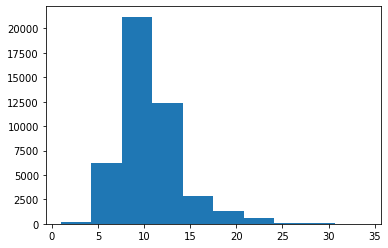

In [30]:
#How long are each of the titles
highest = []
for x in df["encoded"]: highest.append(len(x))
max(highest)
import matplotlib.pyplot as plt 
counts, bins = np.histogram(highest)
plt.hist(bins[:-1], bins, weights=counts)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 20
X = pad_sequences(list(df.encoded), maxlen=max_length, padding='pre')
y = np.array(df.type)

In [32]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #default shuffle = True but random state = 42 means always same random shuffle



In [43]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout,Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
"""## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(218605,embedding_vector_features,input_length=20)) ## embedding layer used 40 features to make feature representation of the sentences
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3)) ## drop out layer to make the model more regularized
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary()) ## model architechture done"""
#Embeddings make it easier to do machine learning on large inputs like sparse vectors representing words. 
#An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors. Embeddings make it easier to do machine learning on large inputs like sparse vectors representing words. 
model = Sequential()
#45 features for feauture representation
model.add(Embedding(1000, 45, input_length=max_length)) #EMBEDDING IS FOR TEXT PROCESSING ONLY
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())
# fit the model
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.948):
      print("\nReached 94% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 45)            45000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 45)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 900)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 900)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 901       
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
history = model.fit(x_train, y_train, validation_split=.2, epochs=5, batch_size=5, verbose=1, callbacks=[callbacks])

Epoch 1/5
5705/5747 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8805
Reached 94% accuracy so cancelling training!
5747/5747 [==============================] - 9s 1ms/step - loss: 0.2939 - accuracy: 0.8808 - val_loss: 0.1370 - val_accuracy: 0.9485


In [296]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 94.242764


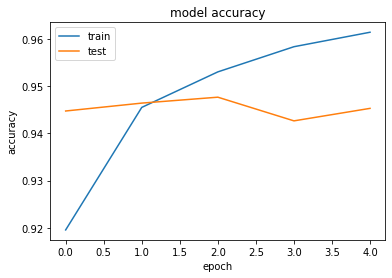

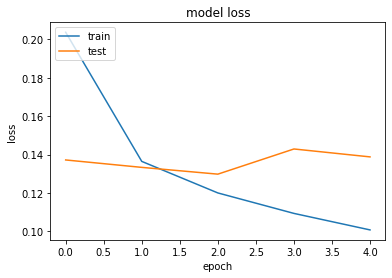

In [297]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#predictions = model.predict(x_test).reshape(1,-1).round(0)
#len(y_test[predictions[0] == y_test])/len(y_test)

In [298]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets
